In [1]:
#%pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.

In [23]:
#imports
import os
import cv2
import imghdr
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model
from matplotlib import pyplot as plt
from keras.applications import ResNet50
from sklearn.preprocessing import normalize
from tensorflow.keras.preprocessing import image
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [24]:
# Attributes Initialization
labels_dir = 'Dataset\Annotation'
classes_dir= 'Dataset\Signs'
image_exts = ['jpeg','jpg', 'bmp', 'png','JPG']                               #putting all the wanted image extensions
class_names = ['drink', 'eat', 'hello','help','love','morning','okay', 'please','stop','thankyou']
image_size = (224, 224)
batch_size = 32

In [21]:
# #to test whether the directory is read or not
# isExist = os.path.exists(classes_dir)
# print(isExist)
# directory_path=labels_dir
# count=0
# for item in os.listdir(directory_path):
#         item_path = os.path.join(directory_path, item)
#         if os.path.isfile(item_path):
#             count += 1
 
# print('File Count:', count)

True
File Count: 942


In [25]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [26]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
# import glob
# import shutil
# import os
# import xml.etree.ElementTree as ET

In [19]:
# #for each class name loop on annotation find its equivalent label then find this file in images and add it to its file name 
# for x in class_names:
#   directory = labels_dir
#   print("class:",x)
#   # iterate over files in
#   # that directory
#   for filename in os.listdir(directory):
#       image_jpg=os.path.splitext(filename)[0]
#       print(image_jpg)
#       f = os.path.join(directory, filename)
#       # checking if it is a file
#       if os.path.isfile(f):
#           print("xml file :",f)
#           tree = ET.parse(f)
#           root = tree.getroot()
#           tag_name=root[6][0].text
#           print("tag:",tag_name)
#           file_name=image_jpg + ".jpg"
#           #extract the label
#           if (x==tag_name):
#             #get the file from images move to signs\class
#             src_dir=os.path.join(data_dir, file_name)
#             dst_dir = os.path.join(classes_dir, x)
#             print("al image gaya menan:",src_dir)
#             print("al image ray7a fan:",dst_dir)
#             shutil.copy(src_dir,dst_dir)




class: drink
drink.6707995e-2edb-11ee-8c7d-1cbfc06d247e
xml file : Dataset\Annotation\drink.6707995e-2edb-11ee-8c7d-1cbfc06d247e.xml
tag: drink
al image gaya menan: Dataset\Images\drink.6707995e-2edb-11ee-8c7d-1cbfc06d247e.jpg
al image ray7a fan: Dataset\Signs\drink
drink.683e5275-2edb-11ee-862c-1cbfc06d247e
xml file : Dataset\Annotation\drink.683e5275-2edb-11ee-862c-1cbfc06d247e.xml
tag: drink
al image gaya menan: Dataset\Images\drink.683e5275-2edb-11ee-862c-1cbfc06d247e.jpg
al image ray7a fan: Dataset\Signs\drink
drink.6973e106-2edb-11ee-88df-1cbfc06d247e
xml file : Dataset\Annotation\drink.6973e106-2edb-11ee-88df-1cbfc06d247e.xml
tag: drink
al image gaya menan: Dataset\Images\drink.6973e106-2edb-11ee-88df-1cbfc06d247e.jpg
al image ray7a fan: Dataset\Signs\drink
drink.6aab3d52-2edb-11ee-b5ed-1cbfc06d247e
xml file : Dataset\Annotation\drink.6aab3d52-2edb-11ee-b5ed-1cbfc06d247e.xml
tag: drink
al image gaya menan: Dataset\Images\drink.6aab3d52-2edb-11ee-b5ed-1cbfc06d247e.jpg
al image ra

# Image Preprocessing🖼️

In [27]:
image_size = (224, 224)
batch_size = 32

In [30]:
# we define an ImageDataGenerator object and
# * set rescale to 1./255 to rescale the pixel values to the range [0, 1].
data_generator = ImageDataGenerator(rescale=1./255)

# we use the flow_from_directory method of the
# ImageDataGenerator object to load a subset of the dataset
# * we made resizing and image interpolation using bilinear
gen_data = data_generator.flow_from_directory(
    directory=classes_dir,
    target_size=(224, 224),
    batch_size=32, .
    class_mode=None,
    shuffle=False,
    interpolation='bilinear'
)

Found 942 images belonging to 10 classes.


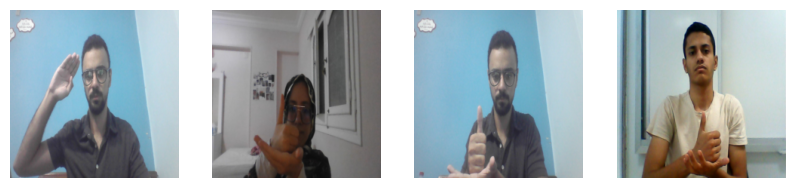

In [33]:
#visualization
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
for i in range(4):

  # convert to unsigned integers for plotting
  image = next(gen_data)[6]

  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  image = np.squeeze(image)

  # plot raw pixel data
  ax[i].imshow(image)
  ax[i].axis('off')